In [1]:
## Imports

import glob
import os

import random

# Import local modules containing all functions
from helpers import *

#Variables
filedir = "../"
segment_length = 0.1  # length of segments in seconds
save_dir = filedir+'/savedBases/'

In [2]:
# Load engines
spec_engines = load_engines('spectrogram', directory=save_dir)

# Load used sounds
used_f = open(filedir + '/sampledFiles.txt', "r")
used_files = used_f.read().split('\n')
num_files = len(used_files)

# Load unused sounds
unused_f = open(filedir + '/unsampledFiles.txt', "r")
unused_files = unused_f.read().split('\n')

In [20]:
# Perform and write matches

to_write = ""
cur_file = 0
cur_percentage = 0

print("Matching...")
for file in unused_files:
    if file == '':
        print("File Unknown")
        continue
    guesses, distances = query_sound(file, spec_engines, num_files, segment_length = segment_length, 
                                     display=False, match_type='spectrogram')
    to_write += file + " _~_ " + str(guesses[0]) + " _~_ " + used_files[guesses[0]] + "\n"
    if (round(cur_file / len(unused_files) * 100) != cur_percentage):
        cur_percentage = round(cur_file / len(unused_files) * 100)
        print(str(cur_percentage) + "%     ", end='')
    cur_file += 1
print("Done Matching")
    
matches_file = open(filedir + '/matchedFiles.txt', "w") 
matches_file.write(to_write)
matches_file.close()

Matching...
1%     2%     3%     4%     5%     6%     7%     8%     9%     10%     11%     12%     13%     14%     15%     16%     17%     18%     19%     20%     21%     22%     23%     24%     25%     26%     27%     28%     29%     30%     31%     32%     33%     34%     35%     36%     37%     38%     39%     40%     41%     42%     43%     44%     45%     46%     47%     48%     49%     50%     51%     52%     53%     54%     55%     56%     57%     58%     59%     60%     61%     62%     63%     64%     65%     66%     67%     68%     69%     70%     71%     72%     73%     74%     75%     76%     77%     78%     79%     80%     81%     82%     83%     84%     85%     86%     87%     88%     89%     90%     91%     92%     93%     94%     95%     96%     97%     98%     99%     100%     File Unknown
Done Matching


list index out of range

Query File



Matched File


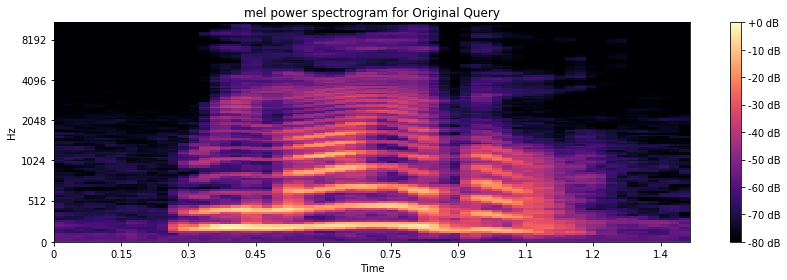

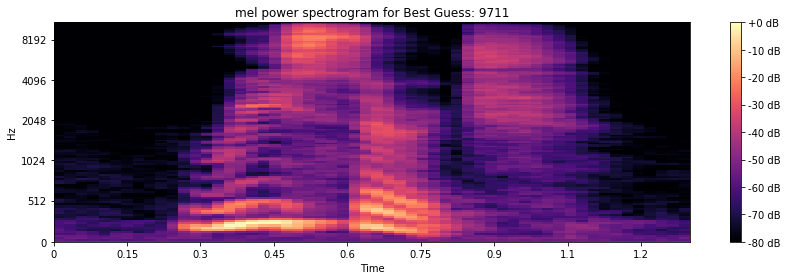

In [32]:
# Check random matches

matches = load_matches(filedir)
to_check = random.choice(matches)

y1,sr1 = librosa.load(to_check[0])
y2,sr2 = librosa.load(to_check[2])
print("Query File")
ipd.display(ipd.Audio(y1, rate = sr1)) # load query file
print("\nMatched File")
ipd.display(ipd.Audio(y2, rate = sr2)) # load matched file

plt.figure(figsize=(12,4))
S = librosa.feature.melspectrogram(y1, sr=sr1, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(log_S, sr=sr1, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram for Original Query')
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()

plt.figure(figsize=(12,4))
S = librosa.feature.melspectrogram(y2, sr=sr2, n_mels=128)
log_S = librosa.power_to_db(S, ref=np.max)
librosa.display.specshow(log_S, sr=sr2, x_axis='time', y_axis='mel')
plt.title('mel power spectrogram for Best Guess: ' + str(guesses[0]))
plt.colorbar(format='%+02.0f dB')
plt.tight_layout()